In [1]:
import dask.dataframe as dd
import pandas as pd
from datetime import datetime, timedelta
exec(open("./lib/splitter.py").read())

In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [3]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles, 6371 for kilometers
    return c * r

def haversineMeters(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles, 6371 for kilometers
    return c * r * 1000

def fastMeterDistance(lat1, lon1, lat2, lon2):
    return sqrt((lon2 - lon1)**2 + (lat2 - lat1 )**2) * 100000

def superFastMeterDistance(lat1, lon1, lat2, lon2):
    return (abs((lon2 - lon1)) + abs((lat2 - lat1))) * 100000


def getMeterDistance(lat1, lon1, lat2, lon2):
#     return haversineMeters(lat1, lon1, lat2, lon2)
    return fastMeterDistance(lat1, lon1, lat2, lon2)
    

def isLessThan50Meter(lat1, lon1, lat2, lon2):
    pass
    

In [4]:
date = datetime.strptime('2000-01-01', "%Y-%m-%d")
inputFile = './data/splitted/out_2019-12-19.csv'
df = pd.read_csv(inputFile)

In [5]:
df.head()

,pid,hid,lat,lon,ts,td,dw,tz,gridX,gridY,gridId
0,Santa Clara County,8b36e7aa0781e013ba4f656aaac11c87c6d63816,36.909643,-121.559312,1576782347,11:05:47,Thu,397,3096,9407,309609407
1,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912950,-121.555730,1576771243,08:00:43,Thu,397,3130,9443,313009443
2,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912956,-121.555730,1576771243,08:00:43,Thu,397,3130,9443,313009443
3,Santa Clara County,863934991c5d1389bd16132567a286148108f3d0,36.912956,-121.555730,1576742443,00:00:43,Thu,397,3130,9443,313009443
4,Santa Clara County,e707a9304de98308883ecac832ea47917f395cd5,36.903164,-121.560289,1576773332,08:35:32,Thu,397,3032,9397,303209397


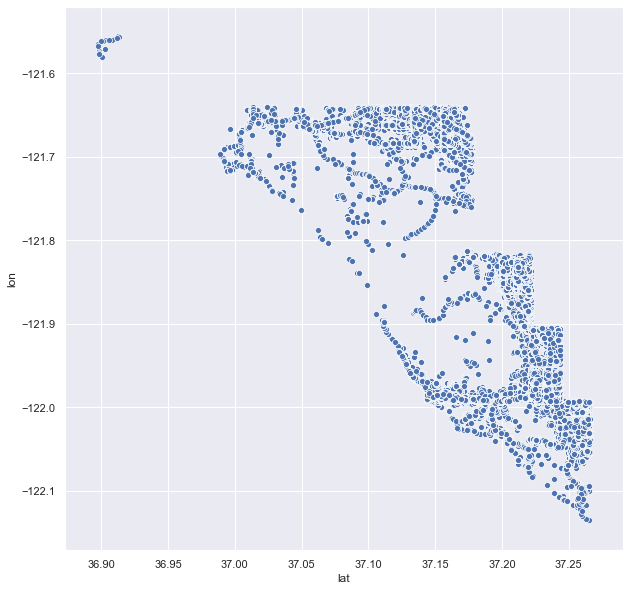

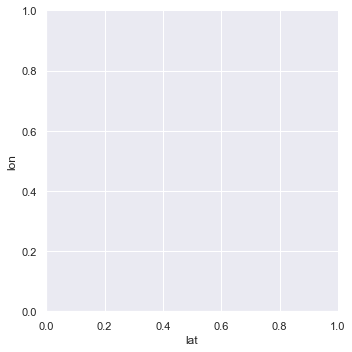

In [6]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df);

In [10]:
len(df.hid.unique())

15277

In [8]:
df.shape

(625711, 11)

In [22]:
hidCounts = df.hid.value_counts()
hidCounts.sort_values(ascending=False, inplace=True)

In [23]:
hidCounts

bdc175ff651a218bc3f5c7655a8246c5848a7030    1926
c6e9100240ea9ce23860f1704789732e953e7df0    1858
c1a93e912e3b4ea205bddc8225d26858a67a66db    1139
b5912e92dbc816ca6600d865f65605c038db4bc2    1074
c9ad797a7c3a94e7dbfc10a8cc5adbb2e45b00b8    1061
                                            ... 
d742bacb30d7d2adfef5d5920ed1b501ff5521f0       1
d0ca2cf6f45550f2174820b7cbe546a702fec596       1
03987f18b35fda47c20cebb4fa0c61cf602d8322       1
d839c76806b9fa486fcdfbe60f1e9ef2a3e33beb       1
bc0e8d8a349a41907e16ca505037e7f10e38f87e       1
Name: hid, Length: 15277, dtype: int64

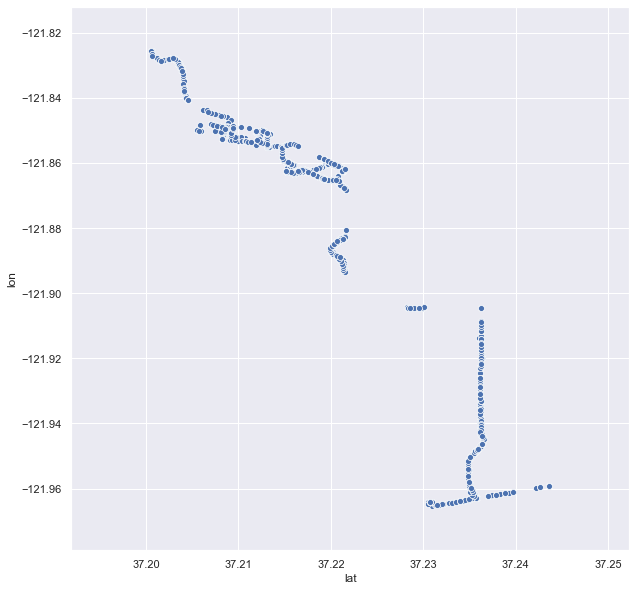

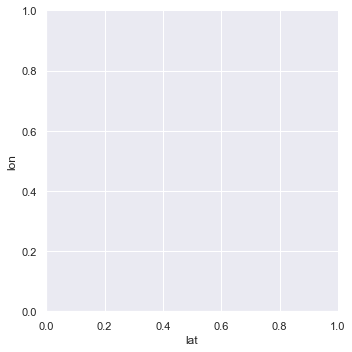

In [28]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df.loc[df.hid == hidCounts.index[0]]);

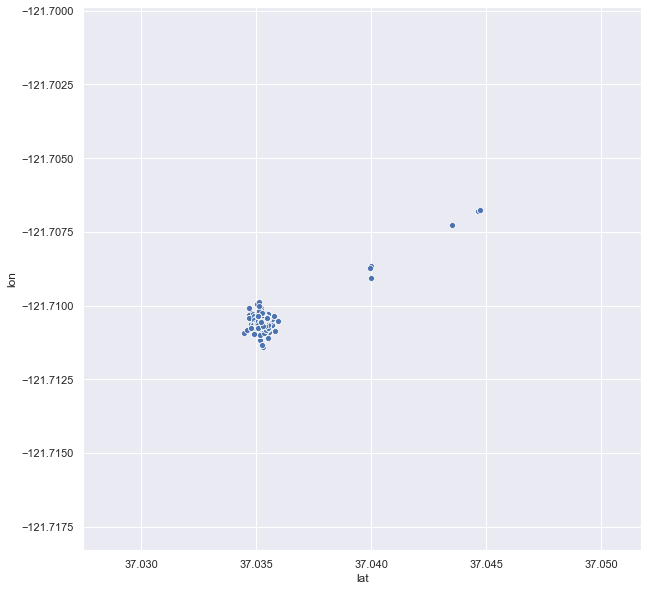

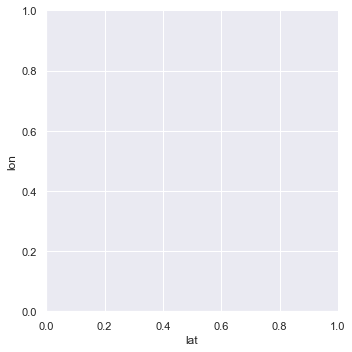

In [30]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df.loc[df.hid == hidCounts.index[1]]);

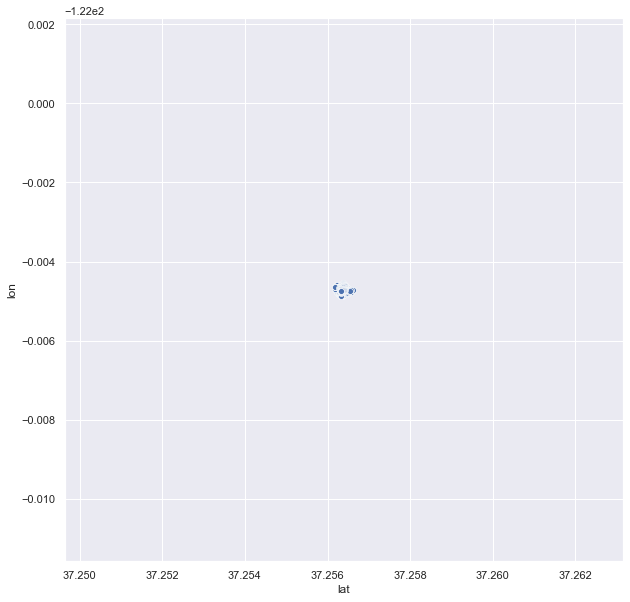

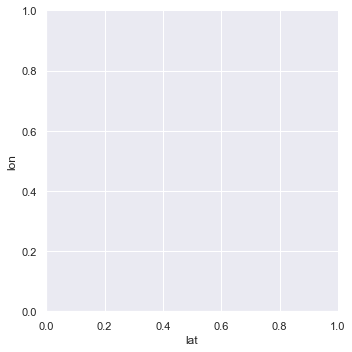

In [31]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.relplot(x="lat", y="lon", ax=ax, data=df.loc[df.hid == hidCounts.index[2]]);